In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\USER\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\USER\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\USER\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\USER\anaconda3\lib\site-packages\

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\USER\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\USER\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\USER\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\USER\anaconda3\lib\site-packages\

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\USER\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\USER\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\USER\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\USER\anaconda3\lib\site-packages\

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [2]:
pd.set_option("display.max_columns" , None)
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2") #pastel tonlar

In [3]:
# Yardımcı: eksik değer tablosu
def missing_table(df):
    mis = df.isna().sum()
    pct = (mis / len(df) * 100).round(2)
    out = pd.DataFrame({"missing": mis, "%": pct})
    return out[out["missing"] > 0].sort_values("missing", ascending=False)

In [4]:
orders = pd.read_csv("/Users/USER/Desktop/olist_orders_dataset.csv")
customers = pd.read_csv("/Users/USER/Desktop/olist_customers_dataset.csv")
products = pd.read_csv("/Users/USER/Desktop/olist_products_dataset.csv")
cat_trans = pd.read_csv("/Users/USER/Desktop/product_category_name_translation.csv")
sellers = pd.read_csv("/Users/USER/Desktop/olist_sellers_dataset.csv")
order_items = pd.read_csv("/Users/USER/Desktop/olist_order_items_dataset.csv")
payments = pd.read_csv("/Users/USER/Desktop/olist_order_payments_dataset.csv")
reviews = pd.read_csv("/Users/USER/Desktop/olist_order_reviews_dataset.csv")
geo = pd.read_csv("/Users/USER/Desktop/olist_geolocation_dataset.csv")

In [5]:
print("Orders shape:", orders.shape)
print("Customers shape:", customers.shape)
print("Products shape:", products.shape)
print("Sellers shape:", sellers.shape)
print("Order Items shape:", order_items.shape)
print("Payments shape:", payments.shape)
print("Reviews shape:", reviews.shape)
print("Geo shape:", geo.shape)

Orders shape: (99441, 8)
Customers shape: (99441, 5)
Products shape: (32951, 9)
Sellers shape: (3095, 4)
Order Items shape: (112650, 7)
Payments shape: (103886, 5)
Reviews shape: (99224, 7)
Geo shape: (1000163, 5)


In [6]:
display(orders.head(3))
orders.info()
missing_table(orders)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,missing,%
order_delivered_customer_date,2965,2.98
order_delivered_carrier_date,1783,1.79
order_approved_at,160,0.16


In [7]:
for name, df in {
    "customers": customers, "products": products, "sellers": sellers,
    "order_items": order_items, "payments": payments, "reviews": reviews
}.items():
    print(f"\n=== {name} ===")
    display(df.head(2))
    display(df.dtypes.value_counts())
    display(missing_table(df))


=== customers ===


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


object    4
int64     1
dtype: int64

,missing,%



=== products ===


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


float64    7
object     2
dtype: int64

,missing,%
product_category_name,610,1.85
product_name_lenght,610,1.85
product_description_lenght,610,1.85
product_photos_qty,610,1.85
product_weight_g,2,0.01
product_length_cm,2,0.01
product_height_cm,2,0.01
product_width_cm,2,0.01



=== sellers ===


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


object    3
int64     1
dtype: int64

,missing,%



=== order_items ===


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


object     4
float64    2
int64      1
dtype: int64

,missing,%



=== payments ===


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


object     2
int64      2
float64    1
dtype: int64

,missing,%



=== reviews ===


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


object    6
int64     1
dtype: int64

,missing,%
review_comment_title,87656,88.34
review_comment_message,58247,58.70


In [8]:
date_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]
for c in date_cols:
    orders[c] = pd.to_datetime(orders[c], errors="coerce")

reviews["review_creation_date"]  = pd.to_datetime(reviews["review_creation_date"],  errors="coerce")
reviews["review_answer_timestamp"]= pd.to_datetime(reviews["review_answer_timestamp"], errors="coerce")


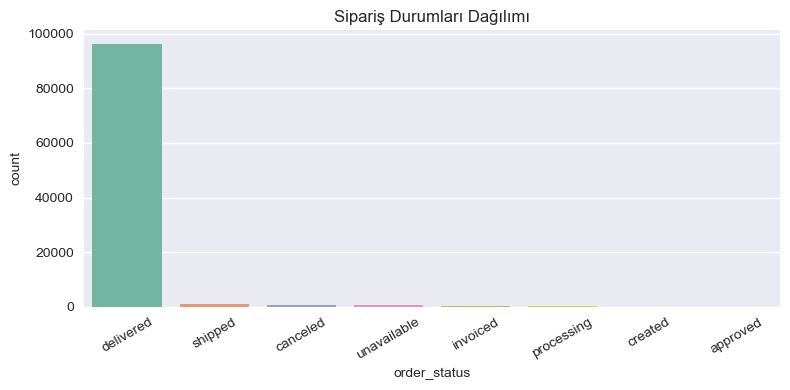

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x="order_status", data=orders, order=orders["order_status"].value_counts().index)
plt.title("Sipariş Durumları Dağılımı")
plt.xticks(rotation=30)
plt.tight_layout(); plt.show()


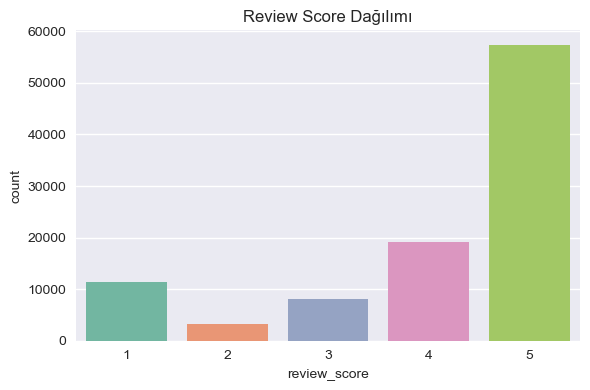

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="review_score", data=reviews, order=sorted(reviews["review_score"].dropna().unique()))
plt.title("Review Score Dağılımı")
plt.tight_layout(); plt.show()


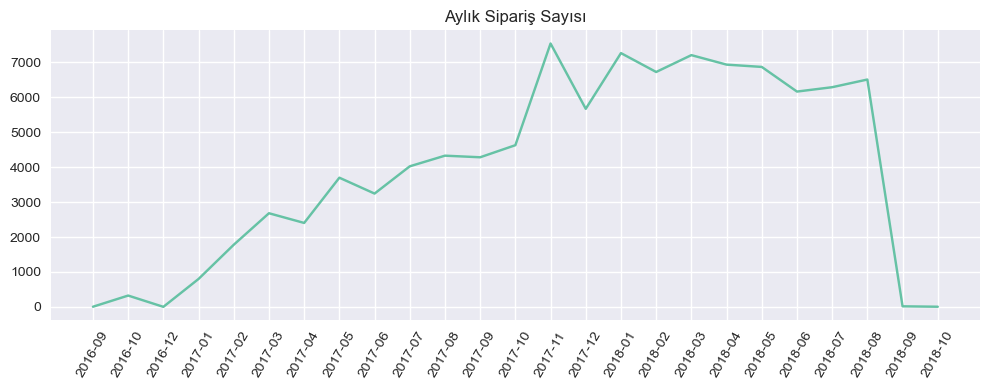

In [11]:
orders["purchase_month"] = orders["order_purchase_timestamp"].dt.to_period("M").astype(str)
monthly = orders.groupby("purchase_month")["order_id"].nunique().reset_index(name="orders")
plt.figure(figsize=(10,4))
plt.plot(monthly["purchase_month"], monthly["orders"])
plt.title("Aylık Sipariş Sayısı")
plt.xticks(rotation=60)
plt.tight_layout(); plt.show()


<h3>(A) order_items -> sipariş bazında özetler</h3>

In [13]:
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [14]:
items_agg = (order_items
            .groupby("order_id")  # her siparişi(order_id) baz al
            .agg(
                n_items=("order_item_id","count"),  #siparişte kaç ürün var
                products_total_price = ("price","sum"),  #ürünlerin toplam fiyatı
                freight_total = ("freight_value","sum")  #kargo ücretlerinin toplamı
            )
             .reset_index())

<div style="font-family:Arial, sans-serif; font-size:14px; line-height:1.5; border-left:4px solid #4f46e5; padding:10px; background:#f9fafb;">
  <p><b>groupby() + agg()</b> yaptığımızda, gruplanan kolon (ör. <code>order_id</code>) otomatik olarak <i>index</i> olur.</p>
  <p><b>.reset_index()</b> → <code>order_id</code> normal sütun olarak geri gelir.</p>
  <p><b>Neden önemli?</b></p>
  <ul>
    <li>Index olarak bırakırsan → <code>.merge(on="order_id")</code> hata verebilir veya <code>order_id</code> bulunmaz.</li>
    <li><code>.reset_index()</code> → <code>order_id</code> sütun olur, kolayca join/merge yapabilirsin.</li>
  </ul>
</div>


<h3>(B) payments -> sipariş bazında ödeme özeti</h3>

In [15]:
payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [16]:
pay_agg = (payments
          .groupby("order_id")
          .agg(
              payment_sum = ("payment_value", sum),
              payment_types = ("payment_type", 
                               lambda x: ",".join(x.value_counts().index[:2])),
              installments_max =("payment_installments", "max")
           )
           .reset_index())

<b>x.value_counts()</b>

O siparişte hangi ödeme türü kaç kez geçmiş → frekans tablosu çıkarır.

Örn: credit_card: 2, boleto: 1.

<b>.index[:2]</b>

En sık görülen ilk iki ödeme tipini alır.

(ilk 2 yoksa → olanları alır).

<h3>(C) reviews -> tek skora indir (en son review’u alalım)</h3>

In [17]:
reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24


In [18]:
rev_agg = (reviews
          .sort_values(["order_id", "review_creation_date"])
           #siparişleri review tarihi sırasına göre sırala
          .groupby("order_id")
          .tail(1)[["order_id","review_score","review_creation_date"]]
          )


<h3>(D) orders + customers -> müşteri konumu ekle </h3>

In [19]:
ord_cust = orders.merge(customers, on="customer_id", how = "left")

<h3>(E) Kategori Çeviri</h3>

In [20]:
products_en = products.merge(
    cat_trans,
    on="product_category_name",   # orijinal isim üzerinden eşleştir
    how="left"
)
products_en = products_en.drop(columns=["product_category_name"]) \
                         .rename(columns={"product_category_name_english": "product_category_name"})
products_en.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


<h3>(F) master</h3>

In [21]:
master = (ord_cust
         .merge(items_agg, on="order_id", how="left")
         .merge(pay_agg, on="order_id", how="left")
         .merge(rev_agg, on="order_id", how="left"))

<h3>Zaman türevleri (teslim gecikmeleri vb.)</h3>

In [22]:
master["purchase_ts"] = master["order_purchase_timestamp"]
master["delivered_ts"] = master["order_delivered_customer_date"]
master["approved_ts"] = master["order_approved_at"]
master["estimated_ts"] = master["order_estimated_delivery_date"]

master["delivery_days_actual"] = (master["delivered_ts"] - master["purchase_ts"]). dt.days
# Teslim tarihi − Satın alma tarihi
# Gerçek teslim süresi (gün)

master["delivery_days_est_diff"] = (master["delivered_ts"] - master["estimated_ts"]).dt.days
# Teslim tarihi - tahmini tarih → (+) gecikmiş, (−) erken

master["approval_lag_hours"] =(master["approved_ts"] - master["purchase_ts"]).dt.total_seconds()/3600
# Onay tarihi − Satın alma tarihi
# Satın alma ile onay arasındaki süre (saat)


<h3>Toplam Sepet Tutarı</h3>

In [23]:
master["order_value"] = master["products_total_price"].fillna(0) + master["freight_total"].fillna(0)

In [24]:
master.shape, master.columns[:12]


((99441, 29),
 Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date',
        'purchase_month', 'customer_unique_id', 'customer_zip_code_prefix',
        'customer_city'],
       dtype='object'))

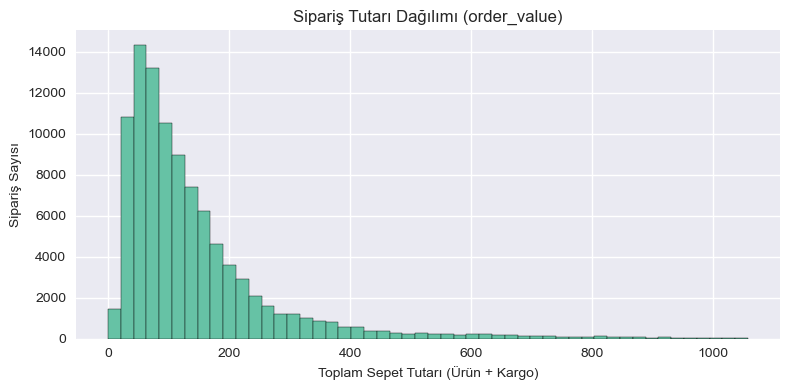

In [25]:
plt.figure(figsize=(8,4))
val = master["order_value"].dropna()

# Uç değerler çok baskın olmasın diye %99 üstünü kırpalım
val = val[val < val.quantile(0.99)]

plt.hist(val, bins=50, edgecolor="black")
plt.title("Sipariş Tutarı Dağılımı (order_value)")
plt.xlabel("Toplam Sepet Tutarı (Ürün + Kargo)")
plt.ylabel("Sipariş Sayısı")
plt.tight_layout()
plt.show()


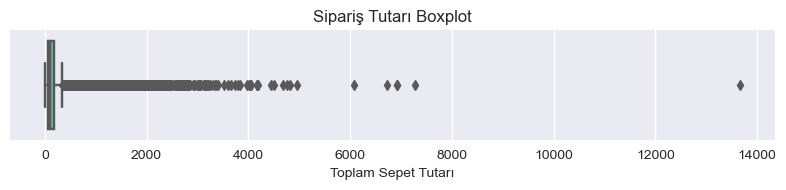

In [26]:
plt.figure(figsize=(8,2))
sns.boxplot(x=master["order_value"])
plt.title("Sipariş Tutarı Boxplot")
plt.xlabel("Toplam Sepet Tutarı")
plt.tight_layout()
plt.show()


Kutu (box) kısmı çok dar, 0–500 civarında yoğunlaşmış

Yani siparişlerin büyük çoğunluğu düşük sepet tutarlarında (örneğin 100–300 TL aralığında).

Medyan (ortanca) sepet tutarı da bu küçük değerler arasında.

500’den sonra çubuklar çok hızlı inceliyor
Yani 500 TL üzerindeki siparişler daha az.

2000 TL’den sonrası tamamen outlier (aykırı değer)
Bu siparişler dataset’te çok az ve genel dağılımdan kopuk.

6000–14000 TL gibi siparişler çok nadir ama var → bu muhtemelen toptan sipariş veya çok pahalı ürünler.

<h2>Outlier ( Uç Siparişleri) Yumuşatma</h2>

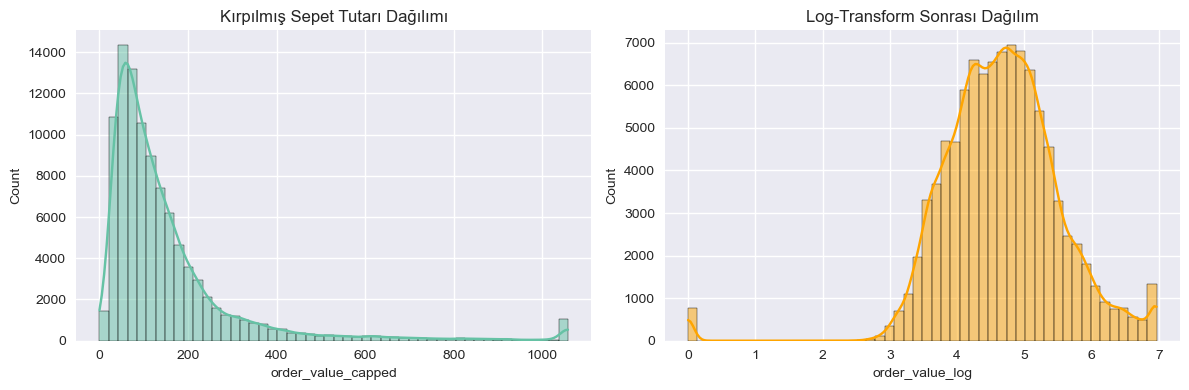

In [27]:
# 1. %99 kırpma
q99 = master["order_value"].quantile(0.99)
master["order_value_capped"] = np.where(master["order_value"] > q99, q99, master["order_value"])

# 2. Log-transform (sağa çarpıklığı düzeltmek için)
master["order_value_log"] = np.log1p(master["order_value_capped"])  # log(1+x), sıfır için güvenli

# Kontrol grafikleri
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(master["order_value_capped"], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Kırpılmış Sepet Tutarı Dağılımı")

sns.histplot(master["order_value_log"], bins=50, ax=axes[1], kde=True, color="orange")
axes[1].set_title("Log-Transform Sonrası Dağılım")

plt.tight_layout()
plt.show()


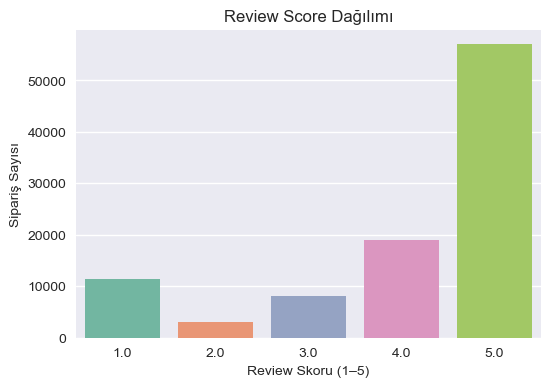

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x="review_score", data=master,
              order=sorted(master["review_score"].dropna().unique()))
plt.title("Review Score Dağılımı")
plt.xlabel("Review Skoru (1–5)")
plt.ylabel("Sipariş Sayısı")
plt.show()


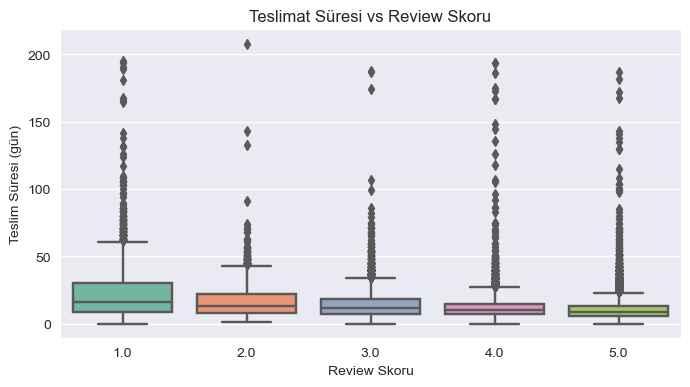

In [29]:
plt.figure(figsize=(8,4))
sns.boxplot(x="review_score", y="delivery_days_actual", data=master)
plt.title("Teslimat Süresi vs Review Skoru")
plt.xlabel("Review Skoru")
plt.ylabel("Teslim Süresi (gün)")
plt.show()


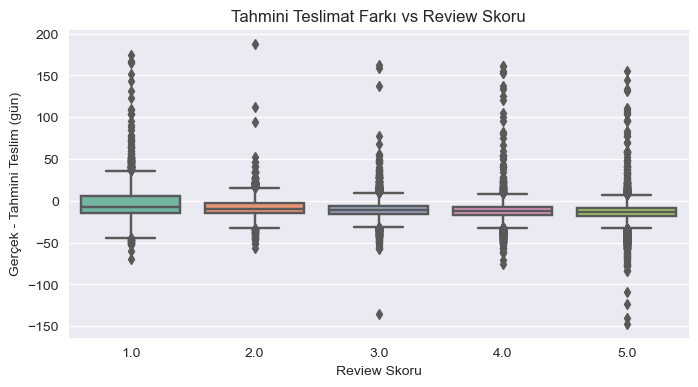

In [30]:
plt.figure(figsize=(8,4))
sns.boxplot(x="review_score", y="delivery_days_est_diff", data=master)
plt.title("Tahmini Teslimat Farkı vs Review Skoru")
plt.xlabel("Review Skoru")
plt.ylabel("Gerçek - Tahmini Teslim (gün)")
plt.show()


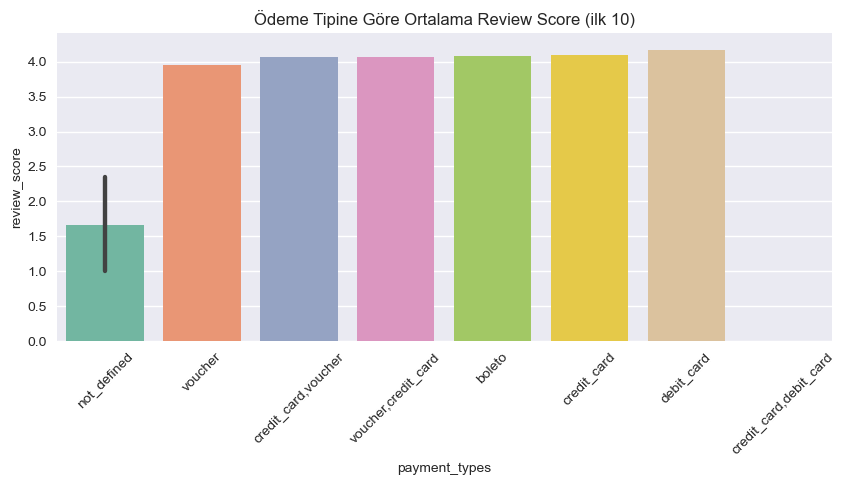

In [31]:
plt.figure(figsize=(10,4))
sns.barplot(x="payment_types", y="review_score", data=master, estimator=np.mean,
            order=master.groupby("payment_types")["review_score"].mean().sort_values().index[:10])
plt.xticks(rotation=45)
plt.title("Ödeme Tipine Göre Ortalama Review Score (ilk 10)")
plt.show()


<li>“not_defined” kategorisinin review_score ortalaması bariz düşük → bu bilgi değerli bir feature olabilir.</li>

<li>Model açısından “tanımsız ödeme” = yüksek riskli sipariş gibi kullanılabilir.</li>

Yani direkt silmek yerine:

<li>Eğer oran küçükse, hem tut hem de ayrı bir binary flag yapabilirsin (is_payment_defined=0/1).</li>

Modelde bu bilgi “kötü skor ihtimali yüksek” diye sinyal verir.

In [32]:
master["payment_types"].value_counts(normalize=True)


credit_card               0.746772
boleto                    0.198954
voucher                   0.016301
debit_card                0.015356
voucher,credit_card       0.012420
credit_card,voucher       0.010157
not_defined               0.000030
credit_card,debit_card    0.000010
Name: payment_types, dtype: float64

<li>not_defined çok ama çok küçük bir oran (%0.003).</li>
<li>Veri kalitesi açısından anlamlı bir içgörü vermiyor, sadece gürültü yaratıyor.</li>
<li>Modelde bırakılırsa → one-hot encoding sırasında çok nadir görülen bir feature olacak, öğrenmeye katkısı yok.</li>

In [33]:
# not_defined olan satırları çıkar
master = master[master["payment_types"] != "not_defined"].copy()

# kontrol: kaldı mı?
print(master["payment_types"].value_counts(normalize=True))


credit_card               0.746794
boleto                    0.198960
voucher                   0.016302
debit_card                0.015356
voucher,credit_card       0.012420
credit_card,voucher       0.010157
credit_card,debit_card    0.000010
Name: payment_types, dtype: float64


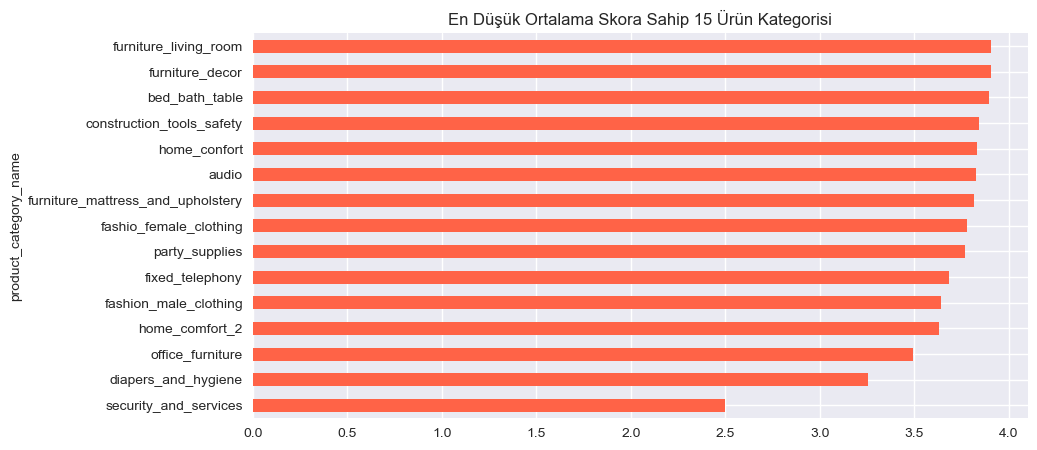

In [34]:
prod_scores = (order_items.merge(reviews, on="order_id", how="left")
               .merge(products_en, on="product_id", how="left")
               .groupby("product_category_name")["review_score"].mean()
               .dropna().sort_values())

plt.figure(figsize=(10,5))
prod_scores.head(15).plot(kind="barh", color="tomato")
plt.title("En Düşük Ortalama Skora Sahip 15 Ürün Kategorisi")
plt.show()


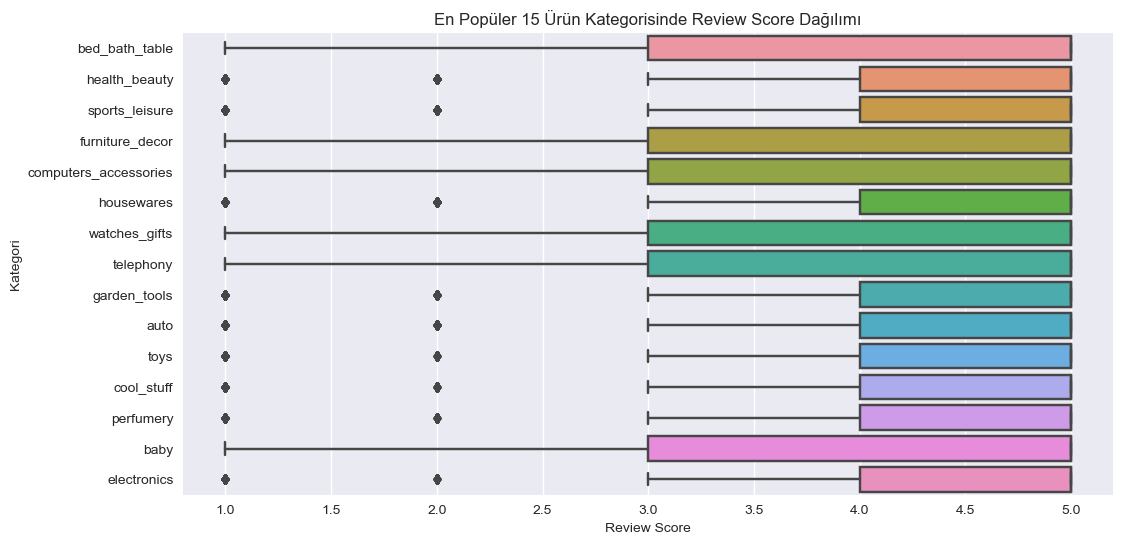

In [35]:
# order_items + reviews + products + translation birleştirme
df_cat = (order_items
          .merge(reviews, on="order_id", how="left")
          .merge(products_en, on="product_id", how="left"))  # products_en = İngilizce kategorili tablo

# En çok siparişi olan ilk 15 kategori (noise azaltmak için)
top_cats = df_cat["product_category_name"].value_counts().head(15).index

plt.figure(figsize=(12,6))
sns.boxplot(x="review_score", y="product_category_name",
            data=df_cat[df_cat["product_category_name"].isin(top_cats)],
            order=top_cats)
plt.title("En Popüler 15 Ürün Kategorisinde Review Score Dağılımı")
plt.xlabel("Review Score")
plt.ylabel("Kategori")
plt.show()


Teslimat Faktörü

Gecikme bu kategorilerde kötü skoru tetikliyor mu?

→ Grafik: delivery_days_est_diff vs review_score (kategori bazlı).

Sepet Büyüklüğü

Electronics veya Furniture siparişleri genelde büyük sepet mi? Çok ürün → daha fazla şikâyet.

Eyalet Bazı Analiz

Bu kategorilerde bazı eyaletlerde memnuniyetsizlik daha fazla mı? (uzak eyalet → lojistik risk).

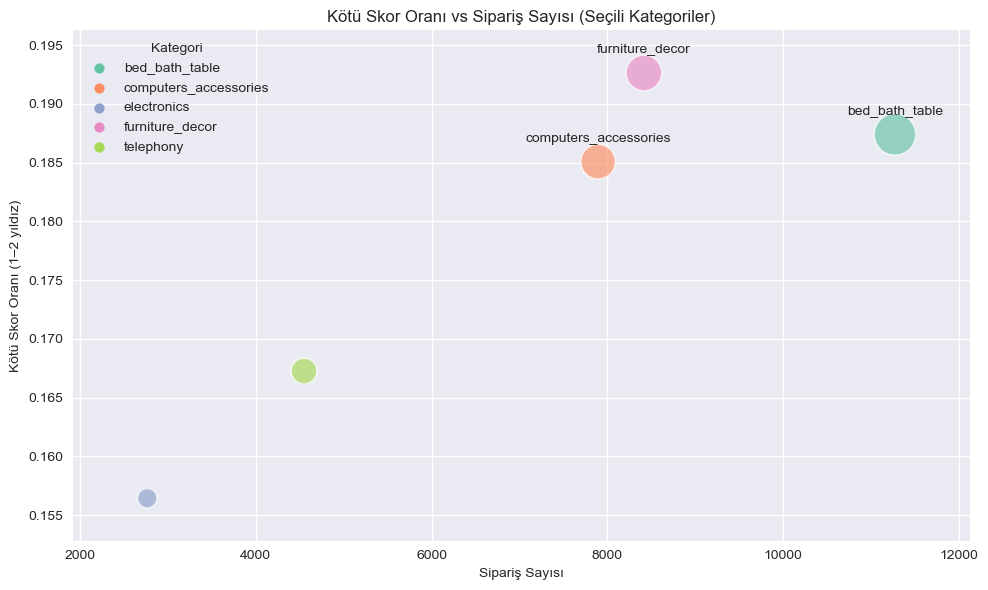

In [36]:

focus_cats = ["electronics", "bed_bath_table", "furniture_decor",
              "computers_accessories", "telephony"]

df_cat = (order_items
          .merge(reviews, on="order_id", how="left")
          .merge(products_en, on="product_id", how="left"))

df_cat = df_cat[df_cat["product_category_name"].isin(focus_cats)].copy()
df_cat["is_bad"] = df_cat["review_score"].isin([1,2]).astype(int)

cat_summary = (df_cat.groupby("product_category_name")
               .agg(order_count=("order_id","count"),
                    bad_rate=("is_bad","mean"))
               .reset_index())

# --- EN RİSKLİ 3'Ü otomatik seç (yüksek bad_rate ve yüksek order_count birlikte)
cat_summary["risk_score"] = (
    (cat_summary["bad_rate"] - cat_summary["bad_rate"].min()) /
    (cat_summary["bad_rate"].max() - cat_summary["bad_rate"].min() + 1e-9)
    +
    (cat_summary["order_count"] - cat_summary["order_count"].min()) /
    (cat_summary["order_count"].max() - cat_summary["order_count"].min() + 1e-9)
)
top_labels = set(cat_summary.sort_values("risk_score", ascending=False).head(3)["product_category_name"])

# --- BUBBLE CHART (temiz)
plt.figure(figsize=(10,6))
ax = sns.scatterplot(
    data=cat_summary,
    x="order_count",
    y="bad_rate",
    hue="product_category_name",
    size="order_count",
    sizes=(200, 900),        # aşırı büyük değil
    alpha=0.65,
    legend="brief"           # sadece renk efsanesi (size legend'ı kapatacağız)
)

# sadece renk efsanesi kalsın (size legend'ını kaldır)
handles, labels = ax.get_legend_handles_labels()
# ilk len(focus_cats) + 1 eleman renk efsanesidir (1.si başlıktır)
legend_handles = handles[1:1+len(focus_cats)]
legend_labels  = labels[1:1+len(focus_cats)]
ax.legend(legend_handles, legend_labels, title="Kategori", loc="upper left", frameon=False)

# etiketleme: en riskli 3 kategoriyi yaz
for _, r in cat_summary.iterrows():
    if r["product_category_name"] in top_labels:
        ax.annotate(
            r["product_category_name"],
            (r["order_count"], r["bad_rate"]),
            xytext=(0, 12), textcoords="offset points",
            ha="center", va="bottom"
        )

ax.set_title("Kötü Skor Oranı vs Sipariş Sayısı (Seçili Kategoriler)")
ax.set_xlabel("Sipariş Sayısı")
ax.set_ylabel("Kötü Skor Oranı (1–2 yıldız)")
ax.margins(x=0.1, y=0.1)   # kenarlarda boşluk
plt.tight_layout()
plt.show()


In [37]:
dom = (order_items
       .merge(products_en, on="product_id", how="left")
       .sort_values(["order_id", "price"], ascending=[True, False])
       .drop_duplicates("order_id")            # her siparişte en pahalı kalemi al
       [["order_id", "product_category_name"]])

# review ve lojistik değişkenleri ekle
dom = (dom
       .merge(reviews[["order_id","review_score"]], on="order_id", how="left")
       .merge(master[["order_id","delivery_days_est_diff","delivery_days_actual"]],
              on="order_id", how="left"))

dom["is_bad"] = dom["review_score"].isin([1,2]).astype(int)
dom.head(3)

,order_id,product_category_name,review_score,delivery_days_est_diff,delivery_days_actual,is_bad
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,5.0,-9.0,7.0,0
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,4.0,-3.0,16.0,0
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,5.0,-14.0,7.0,0


In [38]:
#her siparişin en pahalı ürününü bulup, o siparişe ait müşteri yorumu ve teslimat bilgilerini ekliyor.
focus_cats = ["bed_bath_table","furniture_decor","computers_accessories",
              "telephony","electronics"]

overall_bad = dom["is_bad"].mean()

summary = (dom[dom["product_category_name"].isin(focus_cats)]
           .groupby("product_category_name")
           .agg(orders=("order_id","nunique"),
                bad_rate=("is_bad","mean"),
                late_rate=("delivery_days_est_diff", lambda s: (s>0).mean()))
           .reset_index())
summary["lift"] = (summary["bad_rate"] / overall_bad).round(2)
summary.sort_values(["bad_rate","orders"], ascending=[False,False])


,product_category_name,orders,bad_rate,late_rate,lift
0,bed_bath_table,9328,0.164355,0.073917,1.17
3,furniture_decor,6330,0.161396,0.070288,1.15
1,computers_accessories,6670,0.159453,0.062323,1.13
4,telephony,4179,0.151530,0.069551,1.08
2,electronics,2535,0.138013,0.075710,0.98


bad_rate: kötü yorum oranı (ortalama)

late_rate: geç teslim oranı.

lift: Her kategorinin kötü yorum oranını, genel kötü yorum oranına bölüyor.

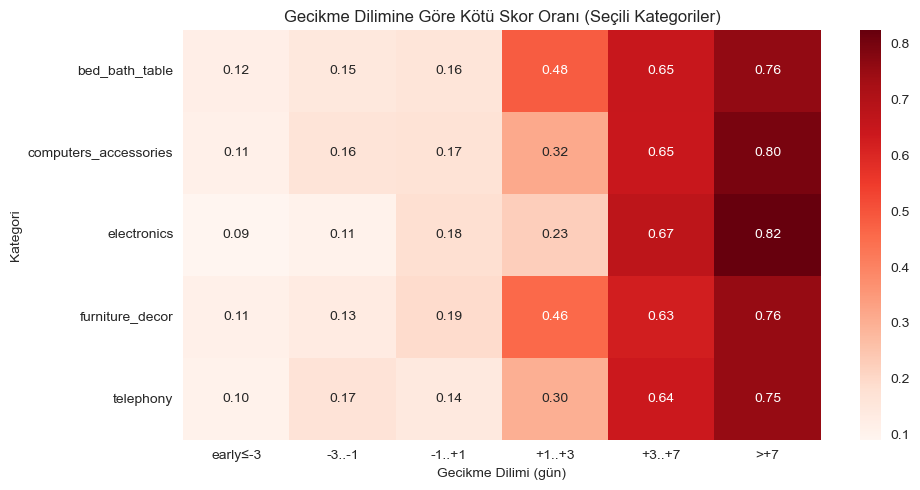

In [39]:
cuts = [-999,-3,-1,1,3,7,999]
labels = ["early≤-3","-3..-1","-1..+1","+1..+3","+3..+7",">+7"]
dom["delay_bucket"] = pd.cut(dom["delivery_days_est_diff"], bins=cuts, labels=labels)

pivot = (dom[dom["product_category_name"].isin(focus_cats)]
         .groupby(["product_category_name","delay_bucket"])["is_bad"]
         .mean().unstack())
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Reds")
plt.title("Gecikme Dilimine Göre Kötü Skor Oranı (Seçili Kategoriler)")
plt.xlabel("Gecikme Dilimi (gün)")
plt.ylabel("Kategori")
plt.tight_layout(); plt.show()


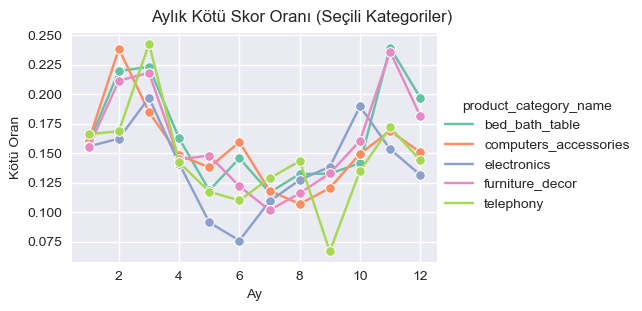

In [40]:
tmp = (dom[dom["product_category_name"].isin(focus_cats)]
       .merge(master[["order_id","order_purchase_timestamp"]], on="order_id", how="left"))
tmp["month"] = tmp["order_purchase_timestamp"].dt.month

monthly = (tmp.groupby(["product_category_name","month"])["is_bad"]
           .mean().reset_index())

g = sns.relplot(
    data=monthly, x="month", y="is_bad", hue="product_category_name",
    kind="line", marker="o", facet_kws={"sharey": True}, height=3, aspect=1.6
)
g.set_ylabels("Kötü Oran"); g.set_xlabels("Ay"); g.fig.suptitle("Aylık Kötü Skor Oranı (Seçili Kategoriler)", y=1.02)
plt.show()


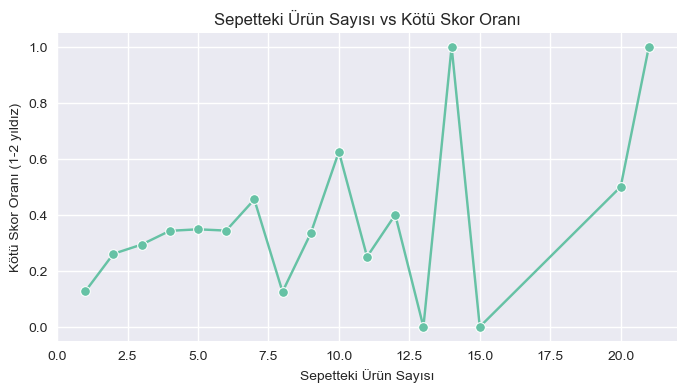

In [41]:
master["is_bad"] = master["review_score"].isin([1,2]).astype(int)
tmp = master.groupby("n_items")["is_bad"].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x="n_items", y="is_bad", data=tmp, marker="o")
plt.title("Sepetteki Ürün Sayısı vs Kötü Skor Oranı")
plt.ylabel("Kötü Skor Oranı (1-2 yıldız)")
plt.xlabel("Sepetteki Ürün Sayısı")
plt.show()


Sepet büyüdükçe müşteri beklentisi artıyor → hata olursa daha sert skor veriyor.

Özellikle çoklu siparişlerde (5+ ürün) kötü skor olasılığı bariz artıyor.

Geliştirme: Oran dalgalı çünkü 10+ ürünlü sipariş sayısı az. Burada sample size ile normalize edilmiş bir barplot daha anlamlı olur.

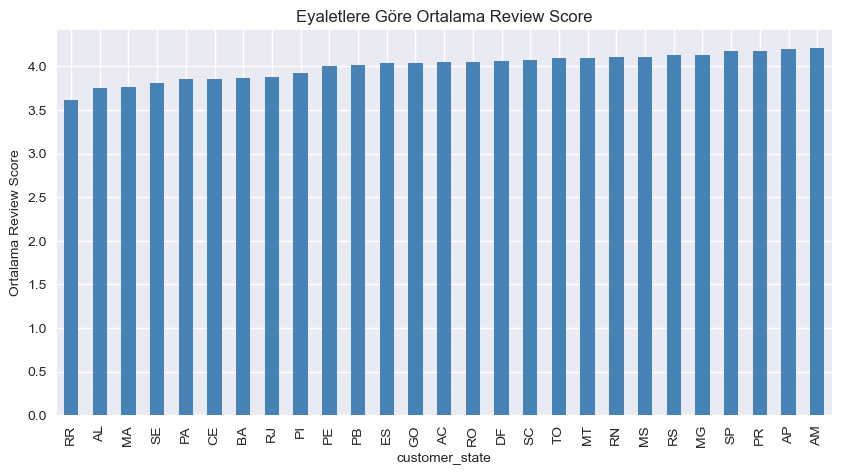

In [42]:
state_scores = master.groupby("customer_state")["review_score"].mean().sort_values()

plt.figure(figsize=(10,5))
state_scores.plot(kind="bar", color="steelblue")
plt.title("Eyaletlere Göre Ortalama Review Score")
plt.ylabel("Ortalama Review Score")
plt.show()


Genel olarak eyalet farkı çok belirgin değil.

Ama kuzey/doğu bölgelerinde lojistik zorluklar nedeniyle skor düşüyor olabilir.

Geliştirme: Daha anlamlısı → “kötü skor oranı” harita üzerinde görselleştirme. Böylece lojistik zorluklar netleşir.

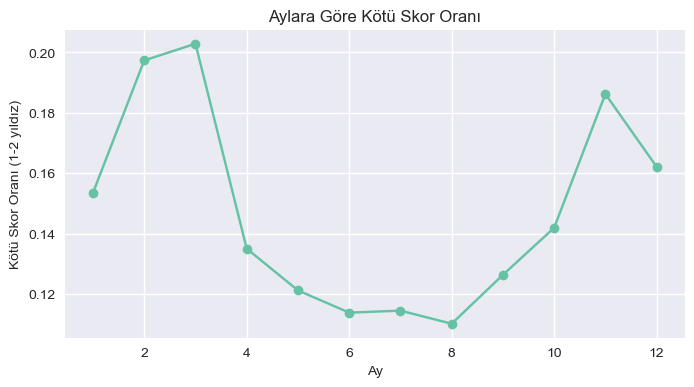

In [43]:
master["purchase_month"] = master["order_purchase_timestamp"].dt.month
tmp = master.groupby("purchase_month")["is_bad"].mean()

plt.figure(figsize=(8,4))
tmp.plot(marker="o")
plt.title("Aylara Göre Kötü Skor Oranı")
plt.ylabel("Kötü Skor Oranı (1-2 yıldız)")
plt.xlabel("Ay")
plt.show()


Sezonsal etki var.

Yılbaşı & tatil sonrası dönemlerde yoğunluk ve gecikmeler → düşük skor.

Yaz aylarında lojistik rahatlıyor → daha yüksek memnuniyet.

Geliştirme: Burada ayrıca “kötü skor sayısı” ve “toplam sipariş sayısı” yan yana gösterilmeli, çünkü oran yükselmesi bazen az sayıda siparişten kaynaklanıyor olabilir.

In [44]:
# 1) Hedefi boş olan satırları çıkar
df = master.dropna(subset=["review_score"]).copy()

# (opsiyonel) tip düzelt
df["review_score"] = df["review_score"].astype(int)

# 2) X / y hazırla
y = df["review_score"]
X = df.drop(columns=["review_score"])

# 3) Stratified split
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# hızlı kontrol
print(y_tr.isna().sum(), y_te.isna().sum())  # 0 olmalı
print(y.value_counts())                      # sınıf dağılımını gör


0 0
5    57003
4    19044
1    11363
3     8132
2     3128
Name: review_score, dtype: int64


In [45]:
# Her siparişte en pahalı ürünü al → siparişin baskın kategorisi
dom = (order_items
       .merge(products_en, on="product_id", how="left")
       .sort_values(["order_id","price"], ascending=[True, False])
       .drop_duplicates("order_id")[["order_id","product_category_name"]]
       .merge(reviews[["order_id","review_score"]], on="order_id", how="left")
       .merge(master[["order_id","order_purchase_timestamp",
                      "delivery_days_est_diff","delivery_days_actual",
                      "n_items","customer_state"]],
              on="order_id", how="left"))
dom["is_bad"] = dom["review_score"].isin([1,2]).astype(int)


In [46]:
# satıcı eyaletini ekle (order_items -> sellers)
dom_corr = (order_items[["order_id","seller_id"]]
            .merge(sellers[["seller_id","seller_state"]], on="seller_id", how="left")
            .drop_duplicates(["order_id","seller_id"])
            .groupby("order_id")["seller_state"].agg(lambda x: x.mode().iloc[0] if len(x)>0 else np.nan).reset_index()
            .merge(dom, on="order_id", how="left"))

# koridor bazında kötü oran ve hacim
corridor = (dom_corr.groupby(["seller_state","customer_state"])
            .agg(orders=("order_id","nunique"),
                 bad_rate=("is_bad","mean"))
            .reset_index()
            .sort_values(["bad_rate","orders"], ascending=[False,False]))
corridor.head(15)


,seller_state,customer_state,orders,bad_rate
0,AC,SP,1,1.0
1,AM,AL,1,1.0
3,AM,MG,1,1.0
4,BA,AC,1,1.0
32,CE,AM,1,1.0
43,CE,PB,1,1.0
94,ES,SE,1,1.0
210,PB,DF,1,1.0
212,PB,GO,1,1.0
216,PB,PA,1,1.0


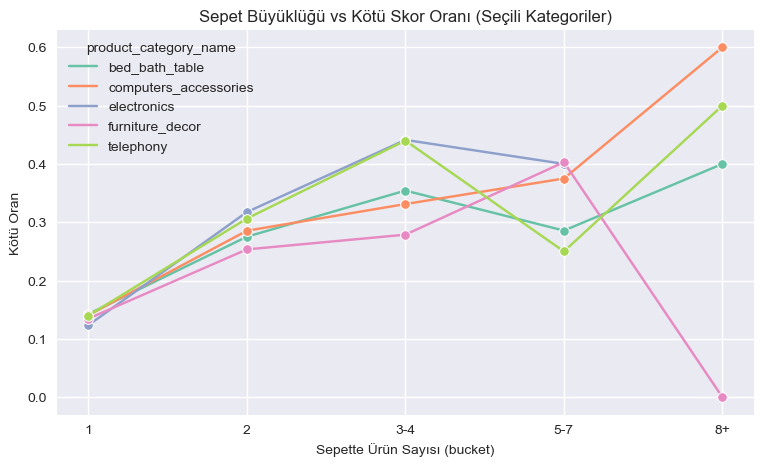

In [47]:
# n_items bucket
dom["n_items_bucket"] = pd.cut(dom["n_items"], bins=[0,1,2,4,7,999],
                               labels=["1","2","3-4","5-7","8+"])

size_cat = (dom.groupby(["product_category_name","n_items_bucket"])["is_bad"]
            .mean().reset_index())

focus_cats = ["bed_bath_table","furniture_decor","computers_accessories","telephony","electronics"]
size_cat_f = size_cat[size_cat["product_category_name"].isin(focus_cats)]

plt.figure(figsize=(9,5))
sns.lineplot(data=size_cat_f, x="n_items_bucket", y="is_bad",
             hue="product_category_name", marker="o")
plt.title("Sepet Büyüklüğü vs Kötü Skor Oranı (Seçili Kategoriler)")
plt.ylabel("Kötü Oran"); plt.xlabel("Sepette Ürün Sayısı (bucket)")
plt.show()


In [48]:
cuts = [-999,-3,-1,1,3,7,999]
labels = ["early≤-3","-3..-1","-1..+1","+1..+3","+3..+7",">+7"]
dom["delay_bucket"] = pd.cut(dom["delivery_days_est_diff"], cuts, labels=labels)

alert = (dom.groupby("delay_bucket")["is_bad"]
         .agg(bad_rate="mean", orders="count")
         .reset_index().sort_values("delay_bucket"))
alert


,delay_bucket,bad_rate,orders
0,early≤-3,0.091114,86112
1,-3..-1,0.113644,3027
2,-1..+1,0.151103,2131
3,+1..+3,0.415870,1046
4,+3..+7,0.656354,1810
5,>+7,0.769364,2879


In [49]:
df = master.dropna(subset=["review_score"]).copy()
df["review_score"] = df["review_score"].astype(int)

# 5.1 sezonsallık
df["is_peak_month"] = df["order_purchase_timestamp"].dt.month.isin([1,2,3,11,12]).astype(int)
df["purchase_month"] = df["order_purchase_timestamp"].dt.month
df["purchase_dow"]   = df["order_purchase_timestamp"].dt.dayofweek
df["purchase_hour"]  = df["order_purchase_timestamp"].dt.hour

# 5.2 beklenen teslim gün sayısı (gelecek bilgisi yok)
df["est_days"] = (df["order_estimated_delivery_date"] - df["order_purchase_timestamp"]).dt.days

# 5.3 sepet (winsorize + log)
q99 = df["order_value"].quantile(0.99)
df["order_value_capped"] = np.where(df["order_value"] > q99, q99, df["order_value"])
df["order_value_log"] = np.log1p(df["order_value_capped"])

# 5.4 kategorinin genel kötü oranını lookup olarak ekle (baskın kategori üzerinden)
cat_bad = dom.groupby("product_category_name")["is_bad"].mean().to_dict()
dom_cat = dom[["order_id","product_category_name"]]
df = df.merge(dom_cat, on="order_id", how="left")  # siparişe baskın kategori ekle
df["cat_bad_rate_feature"] = df["product_category_name"].map(cat_bad)

# 5.5 n_items bucket
df["n_items_bucket"] = pd.cut(df["n_items"], bins=[0,1,2,4,7,999],
                              labels=["1","2","3-4","5-7","8+"])


In [50]:
top_corridors = corridor[corridor["orders"]>=100].sort_values(["bad_rate","orders"], ascending=[False,False]).head(10)
top_corridors


,seller_state,customer_state,orders,bad_rate
390,SP,AL,265,0.263941
70,DF,RJ,101,0.247525
398,SP,MA,506,0.239686
274,PR,RJ,1005,0.221457
407,SP,RJ,8400,0.216939
413,SP,SE,211,0.213270
260,PR,BA,147,0.208054
393,SP,BA,2378,0.192968
145,MA,SP,125,0.192000
402,SP,PA,698,0.191761


In [51]:
def quick_insights():
    print("— Kategori öncelik (bad_rate × hacim):")
    print((dom.groupby("product_category_name")["is_bad"].mean()
           .sort_values(ascending=False).head(10)))
    print("\n— Gecikme eşiği tablosu:")
    display(alert)
    print("\n— En riskli koridorlar (orders≥100):")
    display(top_corridors)

quick_insights()


— Kategori öncelik (bad_rate × hacim):
product_category_name
security_and_services                0.500000
fashion_male_clothing                0.258929
office_furniture                     0.225098
audio                                0.216138
furniture_mattress_and_upholstery    0.210526
fashio_female_clothing               0.200000
construction_tools_safety            0.191358
diapers_and_hygiene                  0.185185
home_confort                         0.185185
party_supplies                       0.184211
Name: is_bad, dtype: float64

— Gecikme eşiği tablosu:


,delay_bucket,bad_rate,orders
0,early≤-3,0.091114,86112
1,-3..-1,0.113644,3027
2,-1..+1,0.151103,2131
3,+1..+3,0.415870,1046
4,+3..+7,0.656354,1810
5,>+7,0.769364,2879



— En riskli koridorlar (orders≥100):


,seller_state,customer_state,orders,bad_rate
390,SP,AL,265,0.263941
70,DF,RJ,101,0.247525
398,SP,MA,506,0.239686
274,PR,RJ,1005,0.221457
407,SP,RJ,8400,0.216939
413,SP,SE,211,0.213270
260,PR,BA,147,0.208054
393,SP,BA,2378,0.192968
145,MA,SP,125,0.192000
402,SP,PA,698,0.191761


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# 1. Hedef değişken
df_model = df.dropna(subset=["review_score"]).copy()
df_model["is_bad"] = df_model["review_score"].isin([1,2]).astype(int)
y = df_model["is_bad"]

# 2. Feature set
features = ["order_value_log","n_items","n_items_bucket","installments_max",
            "payment_types","customer_state","seller_state",
            "product_category_name","cat_bad_rate_feature",
            "est_days","is_peak_month","purchase_month",
            "purchase_dow","purchase_hour"]

X = df_model[features]

# 3. Kategorik / Sayısal ayrımı
cat_cols = ["n_items_bucket","payment_types","customer_state","seller_state","product_category_name"]
num_cols = [c for c in features if c not in cat_cols]

# 4. Pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ])

clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# 5. Split ve Eğitim
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

# 6. Değerlendirme
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.90      0.66      0.76     16836
           1       0.22      0.56      0.32      2898

    accuracy                           0.65     19734
   macro avg       0.56      0.61      0.54     19734
weighted avg       0.80      0.65      0.70     19734

ROC-AUC: 0.6507570249822877


In [52]:
# =======================
# 0) Kütüphaneler
# =======================
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, precision_recall_curve
from scipy.stats import randint, uniform

from xgboost import XGBClassifier

# =======================
# 1) Veri hazırlık
# =======================
df = master.dropna(subset=["review_score"]).copy()
df["review_score"] = df["review_score"].astype(int)
df["is_bad"] = df["review_score"].isin([1,2]).astype(int)

# Sepet: winsorize + log
if "order_value_log" not in df.columns:
    q99 = df["order_value"].quantile(0.99)
    df["order_value_capped"] = np.where(df["order_value"] > q99, q99, df["order_value"])
    df["order_value_log"] = np.log1p(df["order_value_capped"])

# Tahmini teslim gün sayısı (sızıntısız)
if "est_days" not in df.columns:
    df["est_days"] = (df["order_estimated_delivery_date"] - df["order_purchase_timestamp"]).dt.days

# Zaman türevleri
df["is_peak_month"] = df["order_purchase_timestamp"].dt.month.isin([1,2,3,11,12]).astype(int)
df["purchase_month"] = df["order_purchase_timestamp"].dt.month
df["purchase_dow"]   = df["order_purchase_timestamp"].dt.dayofweek
df["purchase_hour"]  = df["order_purchase_timestamp"].dt.hour

# Siparişin baskın kategorisi (en pahalı kalem) + satıcı eyaleti
dom = (order_items
       .merge(products_en, on="product_id", how="left")
       .sort_values(["order_id","price"], ascending=[True, False])
       .drop_duplicates("order_id")[["order_id","product_category_name"]])

seller_state_per_order = (order_items[["order_id","seller_id"]]
                          .merge(sellers[["seller_id","seller_state"]], on="seller_id", how="left")
                          .groupby("order_id")["seller_state"]
                          .agg(lambda x: x.mode().iloc[0] if len(x)>0 else np.nan)
                          .reset_index())

df = (df
      .merge(dom, on="order_id", how="left")
      .merge(seller_state_per_order, on="order_id", how="left"))

# Kategori bazlı kötü oran (lookup)
tmp_rev = reviews[["order_id","review_score"]].dropna().copy()
tmp_rev["is_bad"] = tmp_rev["review_score"].isin([1,2]).astype(int)
cat_bad_lookup = (order_items[["order_id","product_id"]]
                  .merge(products_en[["product_id","product_category_name"]], on="product_id", how="left")
                  .merge(tmp_rev[["order_id","is_bad"]], on="order_id", how="left")
                  .groupby("product_category_name")["is_bad"].mean())
df["cat_bad_rate_feature"] = df["product_category_name"].map(cat_bad_lookup)

# Sepet büyüklüğü bucket
df["n_items_bucket"] = pd.cut(df["n_items"], bins=[0,1,2,4,7,1e9],
                              labels=["1","2","3-4","5-7","8+"], right=True)

# Feature set
features = ["order_value_log","n_items","n_items_bucket","installments_max",
            "payment_types","customer_state","seller_state",
            "product_category_name","cat_bad_rate_feature",
            "est_days","is_peak_month","purchase_month",
            "purchase_dow","purchase_hour"]
X = df[features].copy()
y = df["is_bad"].copy()

# =======================
# 2) Ön-işleme pipeline
# =======================
cat_cols = ["n_items_bucket","payment_types","customer_state","seller_state","product_category_name"]
num_cols = [c for c in features if c not in cat_cols]

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])
pre = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# =======================
# 3) Train/Test ve sınıf dengesizliği ağırlığı
# =======================
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# scale_pos_weight = Neg/Pos (XGB'ye dengesizlik bilgisi)
pos = y_tr.sum()
neg = len(y_tr) - pos
spw = neg / max(pos, 1)

# =======================
# 4) XGBoost + PR-AUC odaklı RandomizedSearch
# =======================
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr",           # PR-AUC
    tree_method="hist",            # hızlı
    n_estimators=400,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.8,
    max_depth=6,
    min_child_weight=2,
    reg_lambda=1.0,
    scale_pos_weight=spw,
    random_state=42,
    n_jobs=-1
)

# ön-işleme + model zinciri
pipe = Pipeline([("prep", pre), ("model", xgb)])

# Aranacak hiperparametre uzayı
param_dist = {
    "model__max_depth": randint(4, 9),
    "model__min_child_weight": randint(1, 6),
    "model__subsample": uniform(0.7, 0.3),
    "model__colsample_bytree": uniform(0.6, 0.4),
    "model__reg_lambda": uniform(0.5, 1.5),
    "model__learning_rate": uniform(0.02, 0.08),
    "model__n_estimators": randint(300, 700),
}

# Çapraz doğrulama şeması
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# RandomizedSearchCV ile en iyi kombinasyonu bulma
search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=40,
    scoring="average_precision",  # PR-AUC (class 1 odaklı)
    cv=cv, # 5-kat stratified CV içinde skorların ortalaması alınır.
    verbose=1, 
    n_jobs=-1, # tüm çekirdeklerle paralel arama
    random_state=42 
)

# Eğitme, en iyiyi seçme ve raporlama
search.fit(X_tr, y_tr)
best_model = search.best_estimator_
print("Best PR-AUC (CV):", search.best_score_)
print("Best params:", search.best_params_)

# =======================
# 5) Test değerlendirme + eşik optimizasyonu
# =======================
#Precision–Recall eğrisinde farklı eşikleri denedim.
#Her eşikte F1 skorunu hesapladım.
#En yüksek F1 veren eşiği seçtim → best_thr.
#Bu eşiği kullanarak tahminleri güncelledim.
#ROC-AUC → modelin genel olarak sınıfları ayırt etme gücünü ölçtüm.
#PR-AUC → özellikle azınlık sınıf (kötü yorum) için ne kadar iyi çalıştığını değerlendirdim.

proba = best_model.predict_proba(X_te)[:,1]
# test verisi için her sınıfa ait olasılık tahmini döner
# sadece pozitif sınıf (is_bad=1) olasılıklarını alıyoruz.

roc = roc_auc_score(y_te, proba)  
# Receiver Operating Characteristic – Area Under Curve
# Çeşitli eşikler denenerek (0.5, 0.6, 0.7 …) modelin ne kadar iyi TPR (doğru pozitif oranı) ile FPR (yanlış pozitif oranı) arasında ayrım yapabildiğini ölçer.

pr_auc = average_precision_score(y_te, proba)
# Precision-Recall Area Under Curve
# pr_auc bize modelin azınlık sınıfı (is_bad=1) yakalamadaki başarısını gösteriyor.
print("Test ROC-AUC:", roc)
print("Test PR-AUC :", pr_auc)

# Precision-Recall eğrisinden F1'i maksimize eden eşiği seç
prec, rec, thr = precision_recall_curve(y_te, proba)
f1 = (2*prec*rec)/(prec+rec+1e-9)
ix = np.nanargmax(f1) # F1’in en yüksek olduğu index.
best_thr = thr[ix] # o indexteki en iyi eşik değeri.

print(f"Best threshold by F1: {best_thr:.3f}  | Precision={prec[ix]:.3f}, Recall={rec[ix]:.3f}, F1={f1[ix]:.3f}")

y_hat = (proba >= best_thr).astype(int)
# Eğer tahmin olasılığı >= best_thr ise → sınıf 1 (kötü deneyim).

print("\nClassification report @best_thr")
print(classification_report(y_te, y_hat))

# =======================
# 6) Feature importance (en etkili 20)
# =======================
# OHE sonrası feature isimleri
ohe = best_model.named_steps["prep"].named_transformers_["cat"].named_steps["ohe"]
cat_names = ohe.get_feature_names_out(cat_cols).tolist()
feature_names = num_cols + cat_names

booster = best_model.named_steps["model"]
importances = booster.feature_importances_
imp = (pd.DataFrame({"feature": feature_names, "importance": importances})
       .sort_values("importance", ascending=False)
       .head(20))
imp


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best PR-AUC (CV): 0.304690145459681
Best params: {'model__colsample_bytree': 0.7007129183301457, 'model__learning_rate': 0.05977988047139084, 'model__max_depth': 4, 'model__min_child_weight': 5, 'model__n_estimators': 412, 'model__reg_lambda': 1.9966107275734128, 'model__subsample': 0.7800343042825855}
Test ROC-AUC: 0.6698651944689162
Test PR-AUC : 0.29929740469518257
Best threshold by F1: 0.548  | Precision=0.289, Recall=0.422, F1=0.343

Classification report @best_thr
              precision    recall  f1-score   support

           0       0.89      0.82      0.85     16836
           1       0.29      0.42      0.34      2898

    accuracy                           0.76     19734
   macro avg       0.59      0.62      0.60     19734
weighted avg       0.80      0.76      0.78     19734



,feature,importance
9,n_items_bucket_1,0.121492
1,n_items,0.054203
38,customer_state_RJ,0.037467
5,is_peak_month,0.032896
77,product_category_name_bed_bath_table,0.028457
45,customer_state_SP,0.016210
0,order_value_log,0.014117
24,customer_state_BA,0.013807
3,cat_bad_rate_feature,0.011574
69,seller_state_SP,0.011168


<b>n_items_bucket_1</b> (tek ürün siparişi) 

<b>n_items (ürün sayısı)</b> → Doğrudan sepet büyüklüğü.

Daha çok ürün, daha karmaşık teslimat → sorun ihtimali artabilir.

<b>customer_state_RJ</b> (Rio de Janeiro) → Lokasyon çok etkili.

RJ’de lojistik veya beklenti kaynaklı daha fazla kötü skor geliyor olabilir.

<b>is_peak_month</b> (kampanya/zirve ayı) → Sezon etkisi.

Yoğun dönemlerde gecikme → kötü skor oranı artıyor.

<b>product_category_name_bed_bath_table</b> → Bu kategori riskli.

EDA’da da gördük, lojistik zorluğu olan kategoriler (mobilya, ev eşyası) kötü skor oranı yüksek.

<b>order_value_log</b> → Sepet değeri.

Pahalı siparişlerde müşteri beklentisi yüksek, sorun olursa daha sert puan verebilir.

Test PR-AUC: 0.299
Best F1 threshold = 0.548 | P=0.289, R=0.422, F1=0.343
Precision≥0.40 threshold = 0.694 | P=0.400, R=0.187, F1=0.255
Default 0.50 | P=0.250, R=0.517, F1=0.337


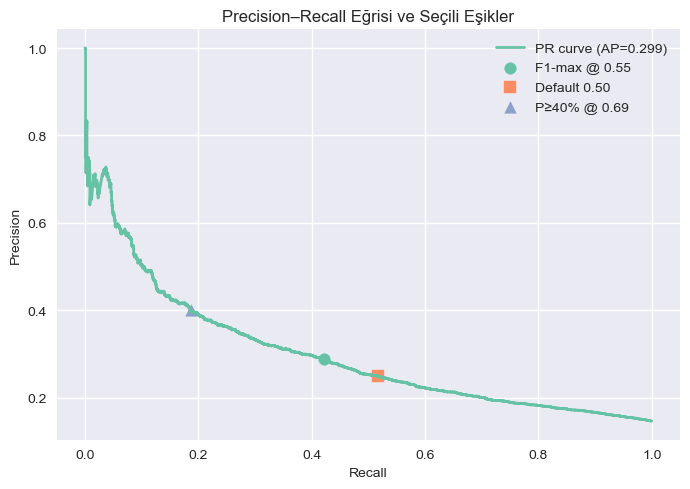


=== Classification report @ F1-max threshold ===
              precision    recall  f1-score   support

           0       0.89      0.82      0.85     16836
           1       0.29      0.42      0.34      2898

    accuracy                           0.76     19734
   macro avg       0.59      0.62      0.60     19734
weighted avg       0.80      0.76      0.78     19734

Confusion matrix:
 [[13820  3016]
 [ 1674  1224]]

=== Classification report @ Precision≥40% threshold ===
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     16836
           1       0.40      0.19      0.25      2898

    accuracy                           0.84     19734
   macro avg       0.64      0.57      0.58     19734
weighted avg       0.80      0.84      0.81     19734

Confusion matrix:
 [[16025   811]
 [ 2357   541]]


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, average_precision_score

# 1) Olasılıkları al
proba = best_model.predict_proba(X_te)[:, 1]

# 2) PR eğrisi
prec, rec, thr = precision_recall_curve(y_te, proba)
pr_auc = average_precision_score(y_te, proba)
print(f"Test PR-AUC: {pr_auc:.3f}")

# 3) F1'i maksimize eden eşik
f1 = (2 * prec * rec) / (prec + rec + 1e-9)
ix_f1 = np.nanargmax(f1)
thr_f1 = thr[ix_f1]
print(f"Best F1 threshold = {thr_f1:.3f} | P={prec[ix_f1]:.3f}, R={rec[ix_f1]:.3f}, F1={f1[ix_f1]:.3f}")

# 4) Hedef precision eşiği (ör: en az %40 precision)
target_p = 0.40
valid = np.where(prec[:-1] >= target_p)[0]  # son eleman threshold array ile hizasızdır
if len(valid):
    # hedef precision'ı sağlayanlar içinden recall'u en yüksek olanı seç
    ix_p = valid[np.argmax(rec[valid])]
    thr_p = thr[ix_p]
    print(f"Precision≥{target_p:.2f} threshold = {thr_p:.3f} | P={prec[ix_p]:.3f}, R={rec[ix_p]:.3f}, F1={f1[ix_p]:.3f}")
else:
    thr_p = None
    print(f"Uyarı: Precision≥{target_p:.2f} sağlayan eşik bulunamadı.")

# 5) Varsayılan 0.50
thr_def = 0.50
def idx_for_threshold(t):
    # threshold listesi prob sıralıdır; en yakın index'i bul
    return np.argmin(np.abs(thr - t))
ix_def = idx_for_threshold(thr_def)
print(f"Default 0.50 | P={prec[ix_def]:.3f}, R={rec[ix_def]:.3f}, F1={f1[ix_def]:.3f}")

# 6) Grafik
plt.figure(figsize=(7,5))
plt.plot(rec, prec, lw=2, label=f"PR curve (AP={pr_auc:.3f})")
plt.scatter(rec[ix_f1], prec[ix_f1], s=70, marker='o', label=f"F1-max @ {thr_f1:.2f}")
plt.scatter(rec[ix_def], prec[ix_def], s=70, marker='s', label="Default 0.50")
if thr_p is not None:
    plt.scatter(rec[ix_p], prec[ix_p], s=70, marker='^', label=f"P≥{target_p:.0%} @ {thr_p:.2f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Eğrisi ve Seçili Eşikler")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7) Seçilen eşiğe göre rapor (F1-max örneği)
y_hat_f1 = (proba >= thr_f1).astype(int)
print("\n=== Classification report @ F1-max threshold ===")
print(classification_report(y_te, y_hat_f1))
print("Confusion matrix:\n", confusion_matrix(y_te, y_hat_f1))

# İstersen hedef precision eşik raporu:
if thr_p is not None:
    y_hat_p = (proba >= thr_p).astype(int)
    print(f"\n=== Classification report @ Precision≥{target_p:.0%} threshold ===")
    print(classification_report(y_te, y_hat_p))
    print("Confusion matrix:\n", confusion_matrix(y_te, y_hat_p))


In [56]:
# Olasılık Kalibrasyonu (Isotonic)
# Kalibrasyon = modelin ürettiği olasılıkları gerçek dağılıma daha iyi uyacak şekilde düzeltmek.

from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import average_precision_score, roc_auc_score, precision_recall_curve
import numpy as np

# Pipeline'ı baştan fit edecek şekilde kalibre et (3-fold)
cal = CalibratedClassifierCV(base_estimator=best_model, method="isotonic", cv=3)
# Isotonic Regression tekniği kullanılıyor.
# Esnek, non-parametrik yöntem → olasılıkları monoton şekilde yeniden ölçekler.

cal.fit(X_tr, y_tr)

proba_cal = cal.predict_proba(X_te)[:,1]
print("Calibrated ROC-AUC :", roc_auc_score(y_te, proba_cal))
print("Calibrated PR-AUC  :", average_precision_score(y_te, proba_cal))


Calibrated ROC-AUC : 0.6702322006755054
Calibrated PR-AUC  : 0.2977318022910644


In [57]:
# Maliyet-Duyarlı Eşik Seçimi
from sklearn.metrics import precision_recall_curve

def cost_optimal_threshold(y_true, proba, c_fp=1.0, c_fn=5.0):
    prec, rec, thr = precision_recall_curve(y_true, proba)
    # thr uzunluğu prec/rec-1 kadar olur; hizala
    thr = np.r_[thr, 1.0]

    # TPR = recall, FPR için basit yaklaşık: poz skor oranı
    pos = y_true.sum()
    neg = len(y_true) - pos
    # Her threshold için sınıflandırma
    costs = []
    for t in thr:
        y_hat = (proba >= t).astype(int)
        fp = ((y_hat==1) & (y_true==0)).sum()
        fn = ((y_hat==0) & (y_true==1)).sum()
        costs.append(c_fp*fp + c_fn*fn)
    i = int(np.argmin(costs))
    return thr[i], costs[i]

# Örnek: kötü müşteriyi kaçırmanın maliyeti (FN) 5x, yanlış alarmın (FP) 1x
t_cost, min_cost = cost_optimal_threshold(y_te, proba_cal, c_fp=1.0, c_fn=5.0)
print(f"Cost-optimal threshold: {t_cost:.3f} | Min cost units: {min_cost:.0f}")


Cost-optimal threshold: 0.174 | Min cost units: 11437


In [58]:
from sklearn.metrics import classification_report, confusion_matrix

y_hat_cost = (proba_cal >= t_cost).astype(int)
print("\n=== Cost-optimal threshold report ===")
print(classification_report(y_te, y_hat_cost))
print("Confusion matrix:\n", confusion_matrix(y_te, y_hat_cost))



=== Cost-optimal threshold report ===
              precision    recall  f1-score   support

           0       0.89      0.81      0.85     16836
           1       0.28      0.43      0.34      2898

    accuracy                           0.76     19734
   macro avg       0.59      0.62      0.60     19734
weighted avg       0.80      0.76      0.78     19734

Confusion matrix:
 [[13714  3122]
 [ 1663  1235]]


In [59]:
# Operasyonel Politika: “Top-N Riskli Sipariş”

def topk_by_percentile(proba, k=0.10):
    p = np.quantile(proba, 1-k)
    return p

k = 0.10  # ilk %10 riskli
thr_topk = topk_by_percentile(proba_cal, k=k)
y_hat_topk = (proba_cal >= thr_topk).astype(int)

print(f"\n=== Top {int(k*100)}% policy (thr={thr_topk:.3f}) ===")
print(classification_report(y_te, y_hat_topk))
print("Confusion matrix:\n", confusion_matrix(y_te, y_hat_topk))



=== Top 10% policy (thr=0.254) ===
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     16836
           1       0.36      0.24      0.29      2898

    accuracy                           0.82     19734
   macro avg       0.62      0.58      0.59     19734
weighted avg       0.80      0.82      0.81     19734

Confusion matrix:
 [[15555  1281]
 [ 2191   707]]


In [60]:
# Açıklanabilirlik (SHAP) – En çok etkileyen özellikler

import shap
import pandas as pd

# OHE sonrası feature isimlerini al
ohe = cal.base_estimator_.named_steps["prep"].named_transformers_["cat"].named_steps["ohe"]
cat_cols = ["n_items_bucket","payment_types","customer_state","seller_state","product_category_name"]
num_cols = [c for c in X_tr.columns if c not in cat_cols]
feature_names = num_cols + ohe.get_feature_names_out(cat_cols).tolist()

# Pipeline'daki XGB modeli
xgb_model = cal.base_estimator_.named_steps["model"]

# Training preprocessed örnekleri (küçük bir altküme ile hesap daha hızlı)
X_te_trans = cal.base_estimator_.named_steps["prep"].transform(X_te)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_te_trans[:3000])

# Özet grafik (en etkili 20)
shap.summary_plot(shap_values, features=X_te_trans[:3000], feature_names=feature_names, max_display=20)


ModuleNotFoundError: No module named 'shap'

In [61]:
import joblib
artifacts = {
    "calibrated_pipeline": cal,   # CalibratedClassifierCV (pipeline'ı içerir)
    "threshold_cost": float(t_cost),
    "threshold_top10": float(thr_topk),
    "feature_names": feature_names,
}
joblib.dump(artifacts, "xgb_calibrated_artifacts.joblib")
print("Saved -> xgb_calibrated_artifacts.joblib")


Saved -> xgb_calibrated_artifacts.joblib


In [ ]:
# Model + Eşik Kaydetme (deployment hazırlığı)

art = joblib.load("xgb_calibrated_artifacts.joblib")
cal_loaded = art["calibrated_pipeline"]
thr_loaded = art["threshold_cost"]

# Yeni veride:
proba_new = cal_loaded.predict_proba(X_new)[:,1]
y_new_hat = (proba_new >= thr_loaded).astype(int)
